# Библиотеки

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
import time
import pandas as pd
import numpy as np
from tqdm import tqdm
import data_loader
import model_training
import plotting_utils

In [2]:
# run this function if you need to generate a csv data set from scratch
# data_loader.generate_csv_dataset()

{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}
INFO: n_fft=4096
{'ravdess': True, 'ravdess_speech': False, 'ravdess_song': False, 'tess': False}


100%|██████████| 1440/1440 [05:28<00:00,  4.38it/s]


--- Data loaded. Loading time: 328.8244206905365 seconds ---
X.shape =  (1440, 80)
y.shape =  (1440, 1)
ID.shape =  (1440, 1)


('data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv',
 'data/y_labels.csv',
 'data/IDs.csv')

In [3]:
X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_4096.csv')
# X, y, ID = data_loader.load_dataset(X_path='data/feature_vector_based_mean_mfcc_and_std_mfcc_nfft_1024.csv')
# X, y, ID = data_loader.load_dataset()

data loaded in 0.04104018211364746ms
          0         1         2         3         4         5         6  \
0 -1.151378  0.323772  0.530925  0.638346  0.895739  0.666624  0.524236   
1 -1.057279  0.372491  0.213538  1.175228  1.005635  0.579586  0.891717   
2 -1.056317  0.588818  0.473571  0.718794  0.632658  0.722399  0.725295   
3 -0.975371  0.463351  0.642362  0.625777  0.830235  1.027107  0.831593   
4 -1.362673  0.773267  0.683576  0.978332  0.916855  0.884359  0.543358   

          7         8         9  ...        70        71        72        73  \
0  1.034262 -0.875917 -0.411641  ... -1.146454 -0.818756 -0.898584 -0.978988   
1  0.649381 -1.014615  0.055115  ... -0.913220 -0.697130 -1.146434 -0.805239   
2  0.575853 -0.728913 -0.691686  ... -1.372340 -1.178163 -1.031987 -1.040342   
3  0.187928 -0.744877 -0.567497  ... -0.692343 -0.933693 -0.446771 -0.819266   
4  0.913303 -0.549810 -0.838744  ... -1.103766 -1.219467 -1.223234 -0.802060   

         74        75        76

In [4]:
ID['0'].unique()    # actors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [5]:
group_members= data_loader.get_k_fold_group_member()


X_k_folds, y_k_folds = data_loader.get_custom_k_folds(X, y, ID, group_members)
print(len(X_k_folds))

5


## SVM with Linear kernel

### Train & evaluate function

### Grid Search (C)

In [ ]:
C = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0, 2.0, 3.0]
UAR_list = []
UAR_best = 0
for val_C in C:
    model = SVC(kernel = 'linear', C=val_C)
    UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
    if UAR_best<UAR:
        UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te
    UAR_list.append(UAR)

fig,ax=plt.subplots(figsize=(7,3.5))
plt.rcParams.update({'font.size': 14})
plt.plot(C,UAR_list, marker='o', linestyle='dashed',)
plt.ylim([0.37, 0.45])
plt.xlabel('C')
plt.ylabel('UAR')

## Results and confusion matrix

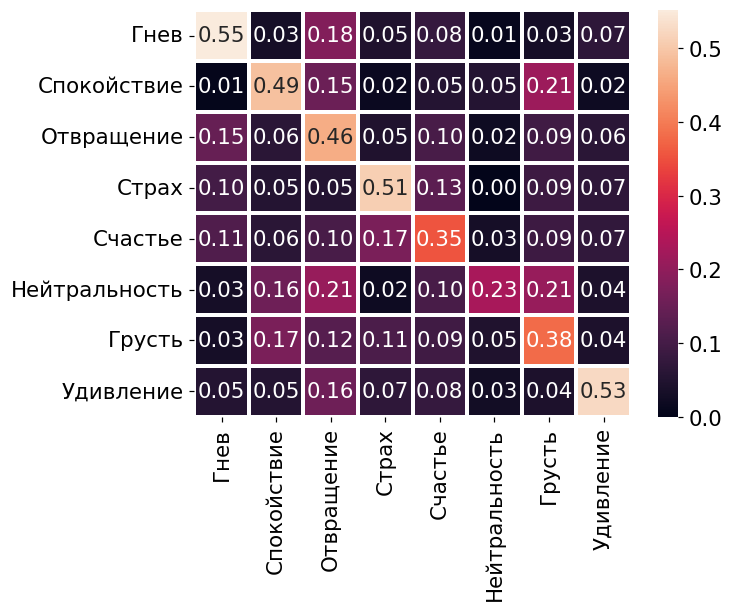

Saving confusion matrix with name:  Doc/figures/confusion_matrix.jpg


In [14]:
plotting_utils.plot_confusion_matrix(y_test, y_true, y_pred)

# SVM (version 2)

100%|██████████| 5/5 [00:00<00:00,  8.98it/s]


UAR = 0.433


100%|██████████| 5/5 [00:00<00:00,  9.39it/s]


UAR = 0.447


100%|██████████| 5/5 [00:00<00:00,  9.25it/s]


UAR = 0.458


100%|██████████| 5/5 [00:00<00:00,  8.05it/s]


UAR = 0.439


100%|██████████| 5/5 [00:00<00:00,  7.43it/s]


UAR = 0.424


100%|██████████| 5/5 [00:00<00:00,  6.09it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


UAR = 0.415


100%|██████████| 5/5 [00:01<00:00,  3.64it/s]


UAR = 0.412


100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


UAR = 0.408


100%|██████████| 5/5 [00:02<00:00,  2.12it/s]


UAR = 0.396
UAR_best = 0.458, C_best = 10.000


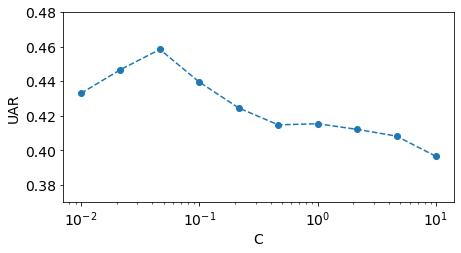

In [10]:
# C = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0, 2.0, 3.0, 10.0]
C = np.logspace(-2, 1, 10, endpoint=True)
UAR_list = []
UAR_best = 0
C_best = 0
for val_C in C:
    model = SVC(kernel = 'linear', C=val_C, decision_function_shape='ovr',break_ties=True)
    UAR,y_pr,y_tr,y_te = model_training.estimate_model(model, X_k_folds, y_k_folds)
    if UAR_best<UAR:
        UAR_best,y_pred,y_true,y_test = UAR,y_pr,y_tr,y_te        
        C_best = val_C
    UAR_list.append(UAR)

## Plot GridSearch results

UAR_best = 0.458, C_best = 0.046


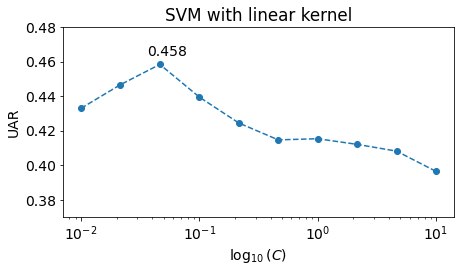

In [26]:
fig,ax=plt.subplots(figsize=(7,3.5))
plt.rcParams.update({'font.size': 14})
# plt.plot(C,UAR_list, marker='o', linestyle='dashed',)
plt.semilogx(C,UAR_list, marker='o', linestyle='dashed',)
plt.ylim([0.37, 0.48])
plt.xlabel('$\log_{10}(C)$')
plt.ylabel('UAR')
plt.text(C_best-0.010, UAR_best+0.005, f'{UAR_best:.3f}')
plt.title('SVM with linear kernel')
print(f'UAR_best = {UAR_best:.3f}, C_best = {C_best:.3f}')

In [17]:
10**(C_best)

1.112796851819528